In [ ]:
!pip install easyocr

import easyocr
import PIL
from PIL import ImageDraw

reader = easyocr.Reader(['en'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

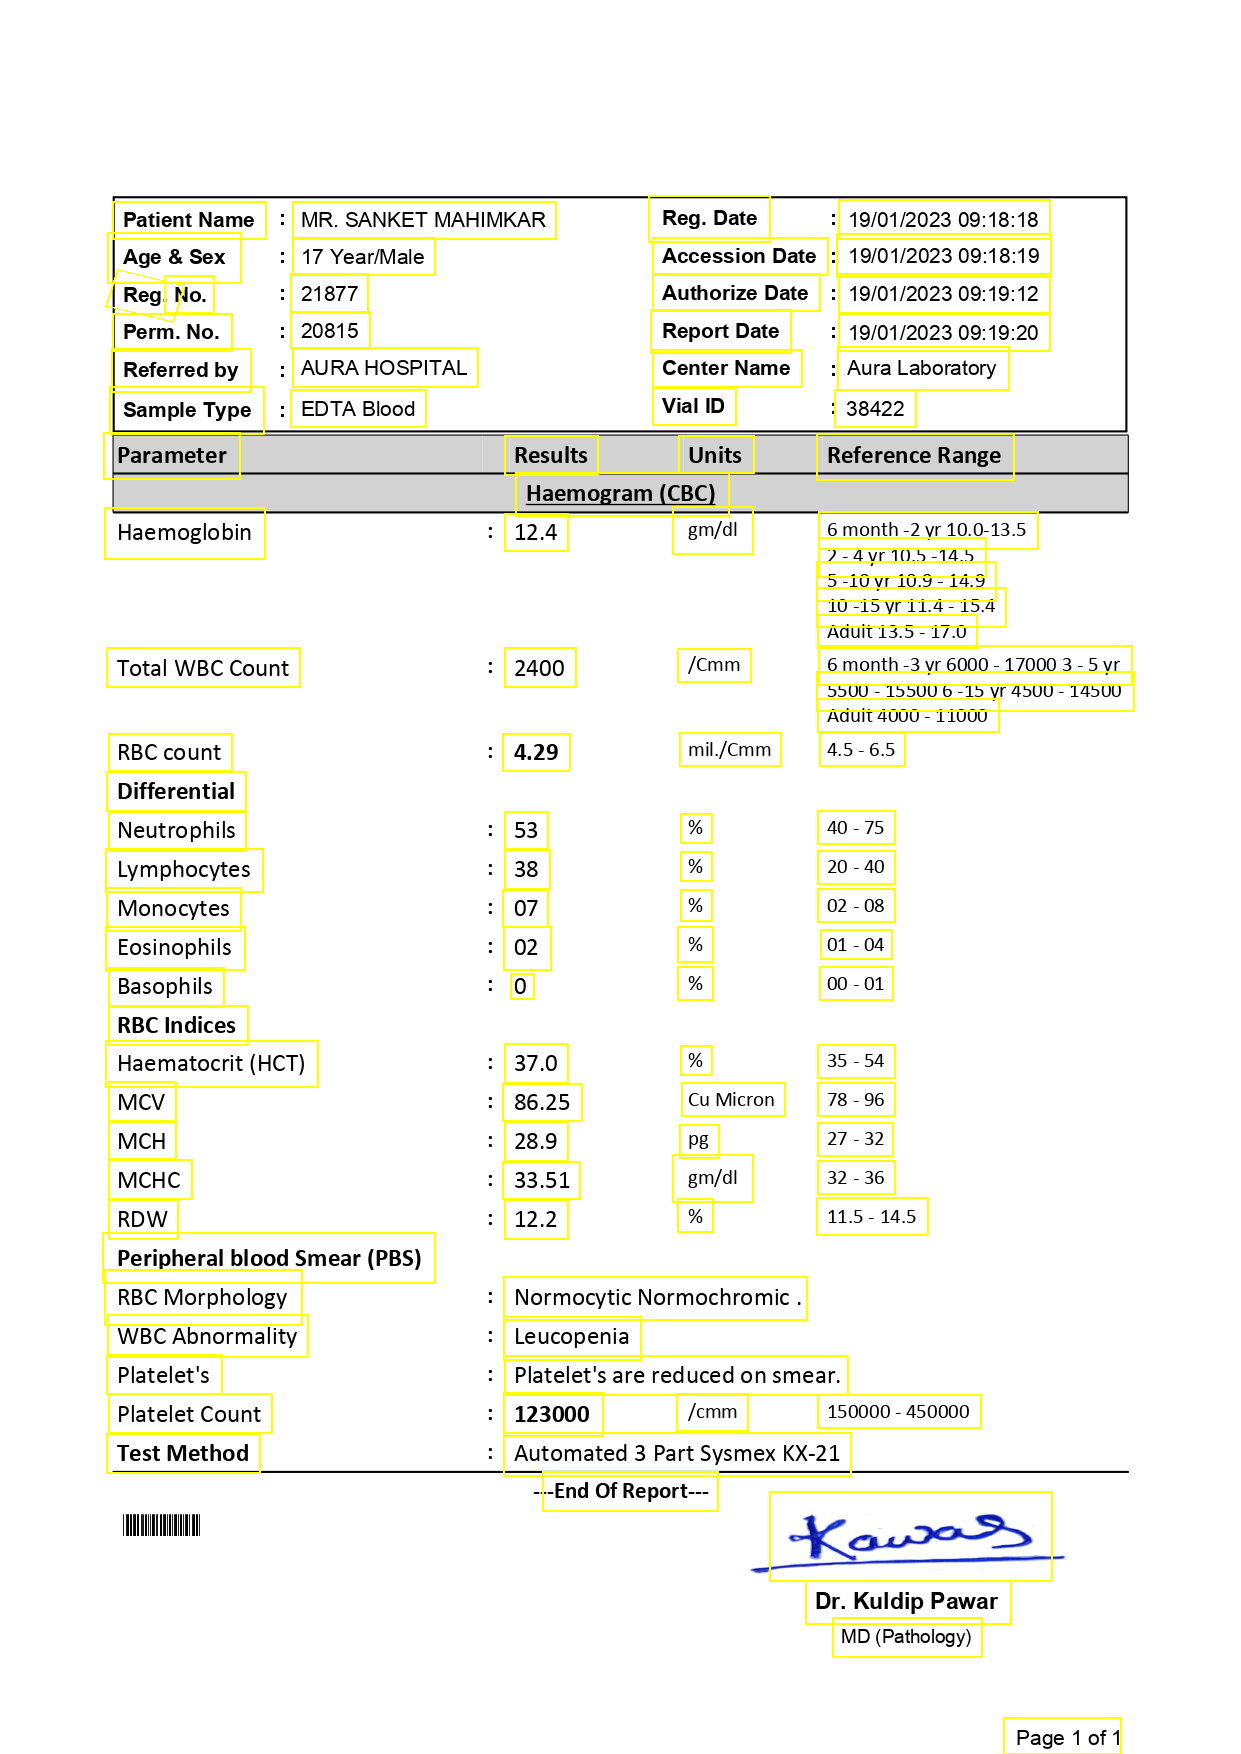

In [ ]:

def drawboxes(image, boxes, color='yellow', width=2):
  draw= ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3=bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
  return image
im = PIL.Image.open("1.jpg")
bounds = reader.readtext("1.jpg", contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45, width_ths=0.7, decoder='beamsearch')
drawboxes(im, bounds)



In [ ]:
bounds

[([[113, 201], [265, 201], [265, 239], [113, 239]],
  'Patient Name',
  0.9999834817764303),
 ([[293, 201], [555, 201], [555, 239], [293, 239]],
  'MR: SANKET MAHIMKAR',
  0.7146352693076391),
 ([[649, 195], [769, 195], [769, 242], [649, 242]],
  '~Reg: Date',
  0.5557273502934335),
 ([[839, 199], [1049, 199], [1049, 239], [839, 239]],
  '19/01./2023 09.18.18',
  0.5566929654430556),
 ([[108, 232], [240, 232], [240, 283], [108, 283]],
  '|Age & Sex',
  0.6260112514052946),
 ([[293, 237], [434, 237], [434, 275], [293, 275]],
  '17 YearMale',
  0.9071733959082156),
 ([[653, 237], [827, 237], [827, 275], [653, 275]],
  'Accession Date',
  0.987203217373266),
 ([[837, 233], [1050, 233], [1050, 277], [837, 277]],
  '19/01/2023 09.18.19',
  0.8731072824972586),
 ([[165, 275], [213, 275], [213, 313], [165, 313]], 'No', 0.9976121211078296),
 ([[291, 273], [367, 273], [367, 313], [291, 313]],
  '21877',
  0.9779454008411903),
 ([[653, 273], [819, 273], [819, 311], [653, 311]],
  'Authorize Date

In [ ]:
import pandas as pd
import numpy as np
import sklearn


In [ ]:
from pandas.io.parsers.readers import read_csv
df=pd.read_csv("new_data.csv")
# df.to_csv("train_data1.csv", index=None, header=True)
df=df.astype(float)
df=df.drop(['index'], axis=1)
df.head

<bound method NDFrame.head of       Haemoglobin  RBC      WBC  Neutrophils  Lymphocytes  Monocytes  \
0             7.4  2.5   2097.0         30.0         14.0        1.4   
1             6.2  3.7   3953.0         29.0         14.0        1.6   
2             7.1  2.7  14686.0         79.0         46.0       11.0   
3            16.0  4.9  10446.0         45.0         40.0        7.0   
4             9.5  3.2   3594.0         89.0         19.0       15.0   
...           ...  ...      ...          ...          ...        ...   
5995          8.8  2.2  15804.0         85.0         16.0       15.0   
5996          9.8  2.9   2005.0         83.0         16.0       11.0   
5997         16.4  5.0   8018.0         47.0         27.0        8.0   
5998          8.0  2.5  14817.0         84.0         13.0       14.0   
5999          8.3  3.1   3651.0         83.0         10.0       13.0   

      Eosinophils  Basophils   HCT   MCV   MCH  MCHC  Platelet   RDW  Output  
0             0.6        0

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
x_train=train_set.iloc[:,train_set.columns != 'Output']
x_test=test_set.iloc[:,train_set.columns != 'Output']
y_train=train_set.iloc[:,-1:]
y_test=test_set.iloc[:,-1:]
print(x_train)

      Haemoglobin  RBC      WBC  Neutrophils  Lymphocytes  Monocytes  \
3897         14.3  5.3   6656.0         51.0         33.0        4.0   
5628          8.3  3.4  14649.0         77.0         45.0       13.0   
1756          8.9  3.1   2050.0         37.0         19.0        0.8   
2346          8.1  3.8   8815.0         46.0         20.0        8.0   
2996         13.7  4.6   9080.0         59.0         20.0        6.0   
...           ...  ...      ...          ...          ...        ...   
3772         15.1  5.6   4128.0         47.0         22.0        3.0   
5191          6.4  2.4  13708.0         80.0         48.0       11.0   
5226          9.3  4.3  11483.0         85.0         10.0       15.0   
5390         14.8  5.9   9255.0         47.0         39.0        6.0   
860           8.1  3.0   7617.0         66.0         38.0        7.0   

      Eosinophils  Basophils   HCT   MCV   MCH  MCHC  Platelet   RDW  
3897          4.0        0.0  37.0  91.0  31.0  35.0  227627.0  

In [ ]:
im = PIL.Image.open("1.jpg")
bounds = reader.readtext("1.jpg", contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45, width_ths=0.7,
                         decoder='beamsearch')

result = {}
d = ['Patient Name', 'Age & Sex', 'Haemoglobin', 'Total WBC Count', 'RBC count', 'Neutrophils', 'Lymphocytes',
     'Monocytes'
    , 'Eosinophils', 'Basophils', 'Haematocrit (HCT)', 'MCV', 'MCH', 'MCHC', 'RDW', 'Platelet Count', 'RDW']
accuracy_result={}

new_param = []
for i in bounds:
    if i[1][0] == '~':
        s = i[1].lstrip('~')
        if(s in d):
          accuracy_result[s]=i[2]
        new_param.append(s)
    elif i[1][0] == '(':
        s = i[1].lstrip('(')
        if(s in d):
          accuracy_result[s]=i[2]
        new_param.append(s)
    elif i[1][0] == '|':
        s = i[1].lstrip('|')
        if(s in d):
         accuracy_result[s]=i[2]
        new_param.append(s)
    else:
        if(s in d):
         accuracy_result[s]=i[2]
        new_param.append(i[1])

for i in range(0, len(new_param)):
    if new_param[i] in d:
        result[new_param[i]] = new_param[i + 1]

param = ['Haemoglobin', 'RBC count', 'Total WBC Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils',
         'Basophils', 'Haematocrit (HCT)', 'MCV', 'MCH', 'MCHC', 'Platelet Count', 'RDW', 'Patient Name']
for i in param:
    if result.get(i) is not None:
        pass
    else:
        result[i] = 0

values = {}

for i in param:
    values[i] = result[i]
# print(values)

for k, v in values.items():
    res = isinstance(v, str)
    if res != True:
        continue
    values[k] = v.replace(',', '.')

# for k,v in values.items():
#     values[k] = float(v)

# for k,v in values.items():
#   print(k," ",v," ",accuracy_result.get(k))
for i in bounds:
  if(i[1] in d):
      print(i[1]," ",values.get(i[1])," ",i[2])


# print(values)

Patient Name   MR: SANKET MAHIMKAR   0.9999834817764303
Haemoglobin   12.4   0.9998114315632193
Total WBC Count   2400   0.8440369015693995
RBC count   4.29   0.7064084603627873
Neutrophils   53   0.9997142409830225
Monocytes   07   0.9997538574063419
Basophils   0   0.9999426197721657
MCV   86.25   0.8128278255462646
MCH   28.9   0.9939450621604919
MCHC   33.51   0.990077555179596
RDW   12.2   0.9970488641782953
Platelet Count   123000   0.7880395143951676


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import numpy as np
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred1 = dtree.predict(x_test)
# print(metrics.accuracy_score(y_test,y_pred1))

val = []
for k,v in values.items():
    val.append(v)

conf_matrix = confusion_matrix(y_test,y_pred1)
print(conf_matrix)
# input_values = np.array(val)
# input_values = input_values.reshape(1,-1)
# y_pred2=dtree.predict(input_values)
# y_pred2.shape
# # print(metrics.accuracy_score(y_test, y_pred2))

[[197   0   0   0   0   0]
 [  0 195   0   0   0   0]
 [  0   0 206   0   0   0]
 [  0   0   0 193   0   0]
 [  0   0   0   0 201   0]
 [  0   0   0   0   0 208]]


In [ ]:
!pip install numpy
import numpy as np

diasum=np.diagonal(conf_matrix).sum()
allsum=conf_matrix.sum().sum()
print(diasum)
print(allsum)
print(diasum/allsum)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1200
1200
1.0


In [ ]:
import pickle
pickle.dump(dtree,open('dtree_model.sav', 'wb'))